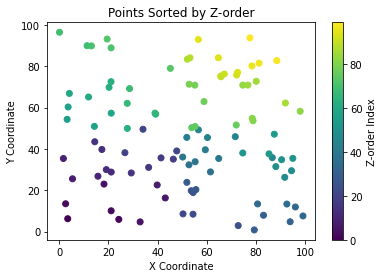

3.4399232194330387 6.215621120335024
24.199198852924077 5.897100500292796
21.08711159629736 10.053302037699563
2.590669695352288 13.445812458926776
18.180005395368028 22.965804388743848
32.86439051200543 4.684257428456117
43.08047198101593 16.258133701500043
39.797343448474045 22.53190128563862
5.385291334993081 25.517474149717234
1.6819932320231823 35.33662623812662
15.726042853247701 26.766453449340123
21.11314207994097 28.78030455231695
19.11806938359566 29.9571958061011
17.326214938694996 39.7016225425175
14.42772565888758 43.44298835330166
29.265798355438765 28.347874053506306
36.32374571580246 31.047287500167975
41.35650722910954 35.649891871630366
46.35134354082621 35.02446278817081
26.679665038177724 38.14391323405976
34.02809664683887 49.48828633412017
47.73840108234412 38.99515858331338
50.29915448466359 8.553347438495496
54.3485122316662 8.40493709245379
72.71492121112104 2.8927255663187657
53.63879897017203 19.761111171756983
54.4023062907595 18.85557837004469
55.5335511669

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def interleave_bits(x, y):
    """
    Simplified 2D Z-order conversion function.
    This uses a simple bit interleaving method, suitable for integers. For actual floating-point data, appropriate mapping is required.
    """
    z = 0
    for i in range(31):  # Assuming 32-bit integers
        z |= (x & (1 << i)) << i | (y & (1 << i)) << (i + 1)
    return z

def float_to_int_mapping(float_val, max_val, bits=31):
    """
    Maps a floating-point number to an integer for bit interleaving.
    max_val is the maximum value in the floating-point data, used for normalization.
    """
    return int((float_val / max_val) * ((1 << bits) - 1))

# Generate random data points
num_points = 100
x_coords = np.random.rand(num_points) * 100  # For example, floating-point numbers between 0 and 100
y_coords = np.random.rand(num_points) * 100

# Map floating-point coordinates to integers
max_val = max(max(x_coords), max(y_coords))
mapped_x = [float_to_int_mapping(x, max_val) for x in x_coords]
mapped_y = [float_to_int_mapping(y, max_val) for y in y_coords]

# Calculate Z-order values and sort
z_order = [interleave_bits(x, y) for x, y in zip(mapped_x, mapped_y)]
sorted_indices = np.argsort(z_order)

# Coordinates sorted by Z-order value
sorted_x_coords = np.array(x_coords)[sorted_indices]
sorted_y_coords = np.array(y_coords)[sorted_indices]

# Visualization of the result
plt.scatter(sorted_x_coords, sorted_y_coords, c=range(num_points), cmap='viridis')
plt.colorbar(label='Z-order Index')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Points Sorted by Z-order')
plt.show()


for sorted_x_coord, sorted_y_coord in zip(sorted_x_coords, sorted_y_coords):
    print(sorted_x_coord, sorted_y_coord)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def interleave_bits(x, y):
    """
    Simplified 2D Z-order conversion function.
    This uses a simple bit interleaving method, suitable for integers.
    """
    z = 0
    for i in range(31):  # Assuming 32-bit integers
        z |= (x & (1 << i)) << i | (y & (1 << i)) << (i + 1)
    return z

def float_to_int_mapping(float_val, max_val, bits=31):
    """
    Maps a floating-point number to an integer for bit interleaving.
    max_val is the maximum value in the floating-point data, used for normalization.
    """
    return int((float_val / max_val) * ((1 << bits) - 1))

# Read data from file
data_file_path = 'path/to/your/data_file.txt'  # Update to your data file path
centroids = []

with open(data_file_path, 'r') as file:
    for line in file:
        _, _, x1, y1, x2, y2 = line.strip().split(',')
        cx = (float(x1) + float(x2)) / 2
        cy = (float(y1) + float(y2)) / 2
        centroids.append((cx, cy))

# Separate coordinates for mapping
x_coords, y_coords = zip(*centroids)  # Unzipping into two lists

# Map floating-point coordinates to integers
max_val = max(max(x_coords), max(y_coords))
mapped_x = [float_to_int_mapping(x, max_val) for x in x_coords]
mapped_y = [float_to_int_mapping(y, max_val) for y in y_coords]

# Calculate Z-order values and sort
z_order = [interleave_bits(x, y) for x, y in zip(mapped_x, mapped_y)]
sorted_indices = np.argsort(z_order)

# Coordinates sorted by Z-order value
sorted_centroids = [centroids[i] for i in sorted_indices]

# Visualization of the result
sorted_x_coords, sorted_y_coords = zip(*sorted_centroids)  # Unzipping sorted centroids
plt.scatter(sorted_x_coords, sorted_y_coords, c=range(len(sorted_centroids)), cmap='viridis')
plt.colorbar(label='Z-order Index')
plt.xlabel('Centroid X Coordinate')
plt.ylabel('Centroid Y Coordinate')
plt.title('Rectangles\' Centroids Sorted by Z-order')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/data_file.txt'